In [4]:
#import relevant libraries
import pandas as pd
#import openai
import requests
#import twarc_csv
import textblob
import nltk
import os
#import twarc
#import wandb

Experiment 1: NLP for investment discovery.

In [22]:
#get list if accounts that follow the defined Twitter List and export to JSONL.
!twarc2 lists members 1555194001631969281 '/list_members3.jsonl'


100% 25/25 [00:00<00:00, 79.70it/s]


In [ ]:
#convert to csv
!twarc2 csv --extra-input-columns "name,public_metrics.listed_count,location,entities.description.urls,description,public_metrics.tweet_count,public_metrics.following_count,pinned_tweet_id,entities.url.urls,entities.description.mentions,url,username,profile_image_url,entities.description.cashtags,public_metrics.followers_count,verified,protected,entities.description.hashtags" "/list_members3.jsonl" "/list_members3.csv" 



100%|████████████████| Processed 211k/211k of input file [00:00<00:00, 9.79MB/s]

ℹ️
Parsed 115 tweets objects from 2 lines in the input file.
Wrote 115 rows and output 92 columns in the CSV.



In [ ]:
#convert to dataframe
df = pd.read_csv('/list_members3')

In [ ]:
#write dataframe to text file so Twarc can read the list of accounts.
with open("output3.txt", "w") as f_out:
    f_out.write("\n".join(df))

In [ ]:
#Use Twarc to pull tweets from the txt file account list.
!twarc2 timelines --timeline-limit 5 --tweet-fields 'created_at,text' --start-time "2021-01-01T12:31:04" --end-time "2021-05-01T12:31:04" --use-search --exclude-retweets --exclude-replies '/Users/pabloelgueta/Downloads/output3.txt' '/Users/pabloelgueta/Downloads/tweets2022.jsonl'


100%|███████████| Processed 115/115 lines of input file [03:50<00:00,  2.00s/it]


In [ ]:
#convert to csv to use with OpenAI API.
!twarc2 csv '/Users/pabloelgueta/Downloads/tweets2022.jsonl' '/Users/pabloelgueta/Downloads/tweets2022.csv'

100%|██████████████| Processed 18.4M/18.4M of input file [00:01<00:00, 12.7MB/s]

ℹ️
Parsed 7580 tweets objects from 98 lines in the input file.
Wrote 7580 rows and output 74 columns in the CSV.



In [ ]:
#convert csv to dataframe.
dft = pd.read_csv('/Users/pabloelgueta/Downloads/tweets2022.csv', low_memory=False) 

In [ ]:
#remove all columns but 'created_at' and 'date'.
dft = dft[['created_at','text']]

In [ ]:
#set OpenAI api key as environment variable.
openai.api_key = os.getenv(""your OpenAI key"")

In [ ]:
#sync openai to wandb to track experiments.
!openai -k "your OpenAI key" wandb sync --project "GPT-3 for Crypto" 

wandb: Currently logged in as: pelgueta. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.21
wandb: Run data is saved locally in /Users/pabloelgueta/Downloads/wandb/run-20220731_132724-ft-3AV7CYxPF9ZGtr2l098EGhS1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ft-3AV7CYxPF9ZGtr2l098EGhS1
wandb: ⭐️ View project at https://wandb.ai/pelgueta/GPT-3%20for%20Crypto
wandb: 🚀 View run at https://wandb.ai/pelgueta/GPT-3%20for%20Crypto/runs/ft-3AV7CYxPF9ZGtr2l098EGhS1
File file-M16OfE1xNC1FCaayYNZ8eUjQ could not be retrieved. Make sure you are allowed to download training/validation files
wandb: Waiting for W&B process to finish... (success).
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:           elapsed_examples ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:             elapsed_tokens ▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
wandb:              training_loss █

In [ ]:
# create eval job
run = wandb.init(project='GPT-3 to NER', job_type='eval')
entity = wandb.run.entity


In [ ]:
#create table in wandb.
prediction_table = wandb.Table(columns=['prompt', 'target', 'completion'], data=data)
wandb.log({'predictions': prediction_table})


In [ ]:
#run fine-tuning of model based on manually created database of tweets and their prompts and responses.
!openai -k "your OpenAI key" api fine_tunes.create -t /Users/pabloelgueta/Downloads/clean_tweets_prepared.jsonl -m davinci

Upload progress: 100%|████████████████████| 39.0k/39.0k [00:00<00:00, 13.1Mit/s]
Uploaded file from /Users/pabloelgueta/Downloads/clean_tweets_prepared.jsonl: file-M16OfE1xNC1FCaayYNZ8eUjQ
Created fine-tune: ft-3AV7CYxPF9ZGtr2l098EGhS1
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2022-07-30 16:46:21] Created fine-tune: ft-3AV7CYxPF9ZGtr2l098EGhS1
[2022-07-30 16:46:25] Fine-tune costs $1.13
[2022-07-30 16:46:25] Fine-tune enqueued. Queue number: 0
[2022-07-30 16:46:26] Fine-tune started
[2022-07-30 16:49:54] Completed epoch 1/4
[2022-07-30 16:50:45] Completed epoch 2/4
[2022-07-30 16:51:35] Completed epoch 3/4
[2022-07-30 16:52:25] Completed epoch 4/4
[2022-07-30 16:53:03] Uploaded model: davinci:ft-personal-2022-07-30-15-53-03
[2022-07-30 16:53:05] Uploaded result file: file-T7T0n3LZD9GSN6Ag8jYueP58
[2022-07-30 16:53:05] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai a

In [ ]:
#set variables and hyperparameters for running model.
n_samples = 30
df = dft.iloc[:n_samples]
openai.api_key = "your OpenAI key"
fine_tuned_model = "text-davinci-002"
few_shot_prompt = "[Prompt]: \"Upcoming Week Research: look more into the code for some of the open source solana projects &amp; playing with rust look into yield farming opps on bsc setup schedule for rest of sol presale launches\n[Organisation]: solana\n###\n[Prompt]: \"April Recap:\n- solana top performer out of alts other than doge\n- raydium TVL 200mil TVL -&gt; 800mil TVL\n- fida / hxro / maps in price discovery\n- oxy &amp; raydium still yet to breakout\n- lots of new projects on sol launching in upcoming weeks + another hackathon from may -&gt; june https://t.co/sLRGtH0mao\n[Organisation]: solana, raydium, fida, hxro, maps, oxy, amp\n###\n[Prompt]: \"overall still bullish altbtc pairs, you should be looking to outperform eth if you're not you should just be sitting in spot defi-eth alts catching up but still lagging behind ftm / matic / avax all launching their gen 0 defi products so interesting to see where liquidity goes\n[Organisation]: eth, ftm, matic, avax\n###\n[Prompt]: if you lose your device you can restore it with a seed, ideally you should be doing this with a @Ledger but if you don't have one yet I'd order one &amp; then you can set that up later once you get it\n[Organisation]: none\n###\n\n"
temperature=0.8
top_p=1
frequency_penalty=0
presence_penalty=0
max_tokens=10

In [ ]:
#run model.
from tqdm import tqdm
data = []

for _, row in tqdm(df.iterrows()):
    prompt = few_shot_prompt + '[Prompt]:'+ row['text']
    res = openai.Completion.create(model= fine_tuned_model, prompt=prompt, max_tokens=max_tokens, temperature=temperature, top_p=top_p,frequency_penalty=frequency_penalty,presence_penalty=presence_penalty,  stop=[" END"])
    completion = res['choices'][0]['text']
    #completion = completion[1:]       # remove initial space
    #prompt = prompt[:-3]              # remove " ->"
    #target = row['completion'][1:-4]  # remove initial space and "END"
    data.append([prompt, completion])


30it [00:24,  1.25it/s]


In [ ]:
# create eval job
run = wandb.init(project='GPT-3 to NER', job_type='eval')
entity = wandb.run.entity

wandb: Currently logged in as: pelgueta. Use `wandb login --relogin` to force relogin


In [ ]:
#create new table in wandb
prediction_table = wandb.Table(columns=['prompt', 'completion'], data=data)
wandb.log({'predictions': prediction_table})


wandb: Network error (ConnectionError), entering retry loop.


Experiment 2: Statistical Analysis of Price vs Volume of Tweets

In [ ]:
#configure Coingecko's API to retrieve price information for 2021.
cdf = pd.DataFrame.from_dict(cg.get_coins_list()) 

In [ ]:
#define list of tokens to iterate
tokenlist = ['ethereum','solana','avalanche-2']

In [ ]:
#loop to pull information, convert to dataframe, clean it and save to csv. 
for i in tokenlist:
    prices = pd.DataFrame(cg.get_coin_market_chart_range_by_id(id=i, vs_currency=['usd'], from_timestamp=['1609459200'],to_timestamp=['1640908800']))
    df_tokenlist = pd.DataFrame.from_dict(prices)
    df_tokenlist = df_tokenlist.drop(['market_caps','total_volumes'], axis=1)
    df_tokenlist['prices'] = df_tokenlist['prices'].astype(str)
    df_tokenlist['prices'] = df_tokenlist['prices'].str.strip('[]')
    df_tokenlist[['Date', i]] = df_tokenlist['prices'].str.split(',', expand=True, n=1,regex=True)
    df_tokenlist = df_tokenlist.drop(['prices'], axis=1)
    df_tokenlist['Date'] = df_tokenlist['Date'].astype(int)
    df_tokenlist[i] = df_tokenlist[i].astype(float)
    df_tokenlist['Date'] = pd.to_datetime(df_tokenlist['Date'],unit='ms')
    df_tokenlist = df_tokenlist[['Date', i]]
    df_tokenlist.to_csv('/Users/pabloelgueta/Documents/dissertation/prices_'+i+'.csv',index=False)
    

In [ ]:
#Pull amount of tweets matching Ethereum OR eth OR ethereum during 2021 and convert to csv.
!twarc2 counts --csv --granularity 'day' --start-time "2021-01-01T12:31:04" --end-time "2021-12-31T00:00:00" --archive 'Ethereum OR eth OR ethereum' '/Users/pabloelgueta/Documents/dissertation/eth_2021.csv'


100%|██████| Processed 11 months/11 months [00:18<00:00, 85483789 tweets total ]


In [ ]:
#Pull amount of tweets matching Solana OR sol OR solana during 2021 and convert to csv.
!twarc2 counts --csv --granularity 'day' --start-time "2021-01-01T12:31:04" --end-time "2021-12-31T00:00:00" --archive 'Solana OR sol OR solana' '/Users/pabloelgueta/Documents/dissertation/solana_2021.csv'

100%|██████| Processed 11 months/11 months [00:17<00:00, 70357691 tweets total ]


In [ ]:
#Pull amount of tweets matching Avalanche OR avax OR avalanche during 2021 and convert to csv.
!twarc2 counts --csv --granularity 'day' --start-time "2021-01-01T12:31:04" --end-time "2021-12-31T00:00:00" --archive 'Avalanche OR avax OR avalanche' '/Users/pabloelgueta/Documents/dissertation/avax_2021.csv'

100%|███████| Processed 11 months/11 months [00:15<00:00, 8435585 tweets total ]


In [ ]:
#install PyCaret, a library for automated machine learning.
!pip install pycaret


In [2]:
#Convert excel file into dataframe.
df_sol = pd.read_excel('sol.xlsx') 

In [16]:
#Convert excel file into dataframe.
df_avax = pd.read_excel('avax.xlsx') 

In [ ]:
#Convert excel file into dataframe.
df_eth = pd.read_excel('eth.xlsx') 

In [7]:
#install dependency for PyCaret.
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#process Ethereum dataframe for PyCaret.
df_eth = df_eth.drop(['date'], axis=1)
df_eth = df_eth.drop([''], axis=1)
df_eth[['date', 'x']] = df_eth['date'].str.split('T', expand=True)
df_eth=df_eth.dropna()

In [7]:
#process Solana dataframe for PyCaret.
df_sol = df_sol.drop(['Date'], axis=1)
df_sol = df_sol.drop([''], axis=1)
df_sol[['Date', 'x']] = df_sol['Date'].str.split('T', expand=True)
df_sol=df_sol.dropna()

In [20]:
#process Avalanche dataframe for PyCaret.
df_avax = df_avax.drop(['Date'], axis=1)
df_avax = df_avax.drop([''], axis=1)
df_avax[['Date', 'x']] = df_avax['Date'].str.split('T', expand=True)
df_avax=df_avax.dropna()

In [17]:
#enable Google Colab compatibility for PyCaret.
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
#imported regression module, selected dataset and defined the target variable. First run for Ethereum dataset.
from pycaret.regression import *
s = setup(data=df_eth, target = 'price')

,Description,Value
0,session_id,7383
1,Target,price
2,Original Data,"(364, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(254, 1)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
#run comparison of all available models and select the one with the best score.
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,306.0896,1.657341e+05,399.1719,0.8457,0.1694,0.1337,0.090
ada,AdaBoost Regressor,312.2477,1.673235e+05,403.2241,0.8428,0.1735,0.1376,0.027
knn,K Neighbors Regressor,310.5182,1.748397e+05,409.2417,0.8380,0.1733,0.1360,0.060
gbr,Gradient Boosting Regressor,312.8855,1.810152e+05,416.8665,0.8339,0.1752,0.1338,0.036
rf,Random Forest Regressor,333.7625,2.049683e+05,442.5756,0.8124,0.1862,0.1429,0.402
et,Extra Trees Regressor,350.4953,2.209351e+05,460.6743,0.7969,0.1994,0.1484,0.347
llar,Lasso Least Angle Regression,370.9889,2.347216e+05,473.3844,0.7833,0.1983,0.1628,0.010
br,Bayesian Ridge,369.7150,2.346207e+05,473.4012,0.7831,0.1966,0.1611,0.009
lar,Least Angle Regression,369.6406,2.346308e+05,473.4199,0.7830,0.1965,0.1610,0.010
lasso,Lasso Regression,369.6406,2.346308e+05,473.4198,0.7830,0.1965,0.1610,0.011


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7383, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#Display the best scoring model.
print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7383, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
#run the best model with multiple folds to try to get a better score.
lightgbm = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,231.5156,72396.8303,269.0666,0.9264,0.1039,0.0853
1,306.3947,154621.6490,393.2196,0.8235,0.1607,0.1266
2,301.5671,152832.2254,390.9376,0.8437,0.1657,0.1304
3,357.9436,232148.2445,481.8176,0.8013,0.1714,0.1290
4,335.3972,181206.0893,425.6831,0.8367,0.1588,0.1259
5,211.6019,96590.5146,310.7901,0.8559,0.1093,0.0766
6,387.1701,251452.6815,501.4506,0.7724,0.1942,0.1579
7,253.2379,100018.5876,316.2572,0.8937,0.1778,0.1394
8,273.9502,148088.8557,384.8231,0.8803,0.1435,0.1067


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=7383, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [36]:
#to achieve better scores, we attempt to fine tune the model and setup the hyperparameters.
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [ ]:
#run the finetuned model.
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,231.5156,72396.8303,269.0666,0.9264,0.1039,0.0853
1,306.3947,154621.6490,393.2196,0.8235,0.1607,0.1266
2,301.5671,152832.2254,390.9376,0.8437,0.1657,0.1304
3,357.9436,232148.2445,481.8176,0.8013,0.1714,0.1290
4,335.3972,181206.0893,425.6831,0.8367,0.1588,0.1259
5,211.6019,96590.5146,310.7901,0.8559,0.1093,0.0766
6,387.1701,251452.6815,501.4506,0.7724,0.1942,0.1579
7,253.2379,100018.5876,316.2572,0.8937,0.1778,0.1394
8,273.9502,148088.8557,384.8231,0.8803,0.1435,0.1067


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=80,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=160, objective=None,
              random_state=7383, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


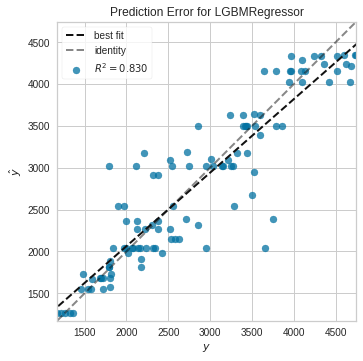

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#prediction error plot of the results.
plot_model(tuned_lightgbm, plot = 'error')


In [31]:
#imported regression module, selected dataset and defined the target variable. First run for Ethereum dataset.
from pycaret.regression import *
s = setup(data=df_sol, target = 'prices')

,Description,Value
0,session_id,5601
1,Target,prices
2,Original Data,"(364, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(254, 1)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='prices',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [32]:
#run comparison of all available models and select the one with the best score.
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,18.4257,734.5482,26.2801,0.8557,0.6538,0.9494,0.020
knn,K Neighbors Regressor,18.4010,746.8296,26.2652,0.8507,0.6725,0.9781,0.059
ada,AdaBoost Regressor,19.6195,828.8354,27.8775,0.8386,0.6892,1.0474,0.026
gbr,Gradient Boosting Regressor,19.1555,861.8547,27.9349,0.8383,0.6813,0.9908,0.036
rf,Random Forest Regressor,20.9241,922.2211,29.1217,0.8257,0.7427,1.0895,0.399
en,Elastic Net,22.7706,1052.1094,31.4865,0.8075,0.6935,1.0698,0.011
lar,Least Angle Regression,22.7706,1052.1094,31.4865,0.8075,0.6935,1.0698,0.011
br,Bayesian Ridge,22.7724,1052.0878,31.4867,0.8075,0.6936,1.0702,0.011
omp,Orthogonal Matching Pursuit,22.7706,1052.1094,31.4865,0.8075,0.6935,1.0698,0.011
ridge,Ridge Regression,22.7706,1052.1093,31.4865,0.8075,0.6935,1.0698,0.010


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5601, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [33]:
#Display the best scoring model.
print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5601, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [34]:
#run the best model with multiple folds to try to get a better score.
lightgbm = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.4791,859.2198,29.3125,0.8485,0.8023,1.4155
1,16.3439,452.0584,21.2617,0.9251,0.5667,0.5979
2,13.4061,516.7441,22.7320,0.8424,0.6888,1.0003
3,20.3877,1071.2448,32.7299,0.6981,0.6863,0.9088
4,21.2641,1223.3609,34.9766,0.7514,0.7644,1.2497
5,12.0522,248.9208,15.7772,0.9572,0.3461,0.3056
6,15.7000,346.5131,18.6149,0.9238,0.4878,0.5083
7,19.9819,644.4913,25.3868,0.8533,0.7056,1.0231
8,18.9211,650.9467,25.5137,0.9184,0.5887,0.7181


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5601, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [37]:
#run the finetuned model.
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.4791,859.2198,29.3125,0.8485,0.8023,1.4155
1,16.3439,452.0584,21.2617,0.9251,0.5667,0.5979
2,13.4061,516.7441,22.7320,0.8424,0.6888,1.0003
3,20.3877,1071.2448,32.7299,0.6981,0.6863,0.9088
4,21.2641,1223.3609,34.9766,0.7514,0.7644,1.2497
5,12.0522,248.9208,15.7772,0.9572,0.3461,0.3056
6,15.7000,346.5131,18.6149,0.9238,0.4878,0.5083
7,19.9819,644.4913,25.3868,0.8533,0.7056,1.0231
8,18.9211,650.9467,25.5137,0.9184,0.5887,0.7181


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=90,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=70, objective=None,
              random_state=5601, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


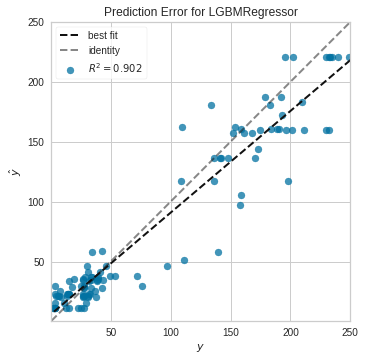

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [38]:
#prediction error plot of the results.
plot_model(tuned_lightgbm, plot = 'error')


In [22]:
#imported regression module, selected dataset and defined the target variable. First run for Avalanche dataset.
from pycaret.regression import *
s = setup(data=df_avax, target = 'price')

,Description,Value
0,session_id,1178
1,Target,price
2,Original Data,"(364, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(254, 1)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [23]:
#run comparison of all available models and select the one with the best score.
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,11.7586,234.3233,15.1510,0.7530,0.4424,0.4491,0.011
lr,Linear Regression,11.7579,234.3179,15.1510,0.7529,0.4423,0.4488,0.236
lasso,Lasso Regression,11.7579,234.3180,15.1510,0.7529,0.4423,0.4488,0.011
ridge,Ridge Regression,11.7579,234.3179,15.1510,0.7529,0.4423,0.4488,0.012
en,Elastic Net,11.7579,234.3179,15.1510,0.7529,0.4423,0.4488,0.012
lar,Least Angle Regression,11.7579,234.3179,15.1510,0.7529,0.4423,0.4488,0.010
omp,Orthogonal Matching Pursuit,11.7579,234.3179,15.1510,0.7529,0.4423,0.4488,0.011
lightgbm,Light Gradient Boosting Machine,11.3258,226.5912,14.9592,0.7494,0.4309,0.4395,0.096
huber,Huber Regressor,11.7537,237.2450,15.2441,0.7490,0.4425,0.4142,0.015
knn,K Neighbors Regressor,11.6356,238.9362,15.3213,0.7392,0.4392,0.4361,0.059


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:compare_models() succesfully completed......................................


In [24]:
#Display the best scoring model.
print(best)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


In [25]:
#run the best model with multiple folds to try to get a better score.
br = create_model('br')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.8337,129.3764,11.3744,0.5822,0.4740,0.4979
1,10.3620,173.2248,13.1615,0.8574,0.4512,0.4223
2,12.4812,246.8315,15.7109,0.6976,0.4892,0.5537
3,9.7330,134.6133,11.6023,0.8143,0.4143,0.4516
4,13.2380,277.9181,16.6709,0.7929,0.4228,0.3959
5,11.5261,223.7168,14.9572,0.7584,0.4596,0.4745
6,11.7558,270.3429,16.4421,0.8551,0.4647,0.4780
7,13.3725,297.2473,17.2409,0.7785,0.4828,0.5127
8,13.2068,297.1687,17.2386,0.6321,0.4152,0.3648


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
INFO:logs:create_model() succesfully completed......................................


In [26]:
tuned_br = tune_model(br,n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.8323,129.2617,11.3693,0.5826,0.4740,0.4984
1,10.3666,173.2414,13.1621,0.8574,0.4513,0.4231
2,12.4776,246.5784,15.7028,0.6979,0.4893,0.5539
3,9.7352,134.5869,11.6012,0.8143,0.4145,0.4522
4,13.2338,277.7896,16.6670,0.7930,0.4227,0.3961
5,11.5259,223.6741,14.9557,0.7584,0.4598,0.4751
6,11.7666,270.8655,16.4580,0.8548,0.4649,0.4783
7,13.3769,297.4946,17.2480,0.7783,0.4830,0.5129
8,13.2024,297.1375,17.2377,0.6322,0.4150,0.3648


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:BayesianRidge(alpha_1=0.0005, alpha_2=0.1, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=0.15, lambda_2=0.3,
              lambda_init=None, n_iter=300, normalize=True, tol=0.001,
              verbose=False)
INFO:logs:tune_model() succesfully completed......................................


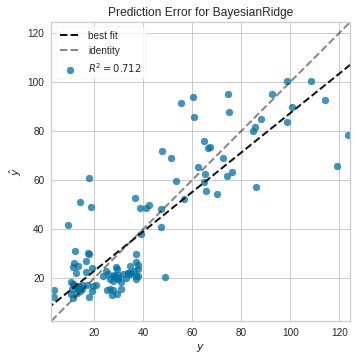

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
#prediction error plot of the results.
plot_model(tuned_br, plot = 'error')